## Moving Average Model of Time Series

### Part 1: Introduction of Time Series

Time Series is a collection of data points collected at **constant time** intervals. 
<br>
These are analyzed to determine long-term trends and to predict the future or perform other forms of analysis.
<br>
<br>
Time Series is ** time dependent ** and along with an increasing or decreasing trend, some Time Series have some form of ** seasonality trends ** which we can analysis.

### Part 2: Introduction of Moving Average

A [Moving Average](https://en.wikipedia.org/wiki/Moving_average) (rolling average or running average) is a calculation to analyze data points by creating series of averages of different subsets of the full data set.  

Given a series of numbers and a fixed subset size, the ** first element ** of the moving average is obtained by taking the average of the ** initial fixed subset ** of the number series. 

#### 1. Simple Moving Average

The simplest form of a moving average, appropriately known as a simple moving average (SMA), is calculated by taking the ** arithmetic mean ** of a given set of values. In other words, a set of numbers, are added together and then divided by the number in the set.


For exmaple, if you want to calculate 10 day moving average of the price, you should first add the price of the last 10 days and divide 10.
The resulting average below (11) takes into account the past 10 data points in order to give traders an idea of how an asset is priced relative to the past 10 days. 

![sma-exmaple](https://i.investopedia.com/inv/articles/site/Calculation1.gif)

The ** "Moving" ** average is different from regular mean that ** New Values ** become available.
The oldest data points must be dropped from the set and new data points must come in to replace them. Thus, the data set is constantly "moving" to account for new data as it becomes available. 

This method of calculation ensures that only the ** Current Information ** is being accounted for. 

In Figure below, once the new value of 5 is added to the set, the red box (representing the past 10 data points) moves to the right and the last value of 15 is dropped from the calculation. 

Because the relatively small value of 5 replaces the high value of 15, you would expect to see the average of the data set decrease, which it does, in this case from 11 to 10.

![sma-exmaple](https://i.investopedia.com/inv/articles/site/calculation2.gif)

To understand it more clear, we can plot two moving average lines of the close price below which have different time periods.

The red line is simply the average price over the past 50 days, while the blue line is the average price over the past 100 days

![sma-exmaple](https://i.investopedia.com/image/png/1519964018927/moving_averages_what_are_they_figure3.png)



#### 2. Exponential Moving Average

However, there is still a probelm, when we calcualte the simple moving average, we use each point in the data series as the same weighting, regardless of where it occurs in the sequence. 

But in real analysis, the most recent data is more significant than the older data and should have a greater influence on the final result. So, if we give higher importance to recent data, we can get a new kind of MA Model - ** Exponential Moving Average ** (EMA). 

here is the EMA equation:
![sma-exmaple](https://i.investopedia.com/inv/articles/site/CalculationEMA.gif)

you may notice that there is no value available to use as the previous EMA. This small problem can be solved by starting the calculation with a simple moving average and continuing on with the above formula from there.


#### 3. Weighted Moving Average

By looking at the calculation of the EMA, you will notice that more emphasis is placed on the recent data points, making it a type of ** Weighted Moving Average **.

The WMA is a weighted average of the last n prices, where the weighting decreases with each previous price. This is a similar concept to the EMA, but the calculation for the WMA is different.

**`(Price X weighting factor) + (Price previous period X weighting factor-1)...`**

If there are four prices you want a weighted moving average of, then the most recent weighting could be 4/10, the period before could have a weight of 3/10, the period prior to that could have a weighting of 2/10, and so on. 10 is a randomly picked number, and a weight of 4/10 means the most recent price will account for 40% of the value of the WMA. The price three periods ago only accounts of 10% of the WMA value.  

Assume prices of 90, 89, 88, 89, with the most recent price first:

((90 x (4/10)) + (89 x (3/10)) + (88 x (2/10)) + (89 x (1/10)) = 36 + 26.7 + 17.6 + 8.9 = 89.2


[Read more - Simple Moving Average](https://www.investopedia.com/university/movingaverage/movingaverages1.asp#ixzz5D2bBkCmk)

[Read more - Weighted Moving Averge](https://www.thebalance.com/simple-exponential-and-weighted-moving-averages-1031196)

### Part 3:  Loading and Handling Time Series in Pandas

Pandas has dedicated libraries for handling TS objects, particularly the datatime64 class which stores time information and allows us to perform some operations really fast.

In [2]:
# Import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Change the size of the plot
rcParams['figure.figsize'] = 15, 6

Now, let's read our Uber and Lyft data from our [Github](https://github.com/MandyYang86/Ride-Optimization)

In [3]:
#Read our data using pandas
data = pd.read_csv("uber_lyft_March.csv")

That's what our data looks like

In [4]:
#Look first five lines in our data
data.head()

,date_time,uber_distance,uber_duration,uber_estimate,uber_high_estimate,uber_low_estimate,main_temp,weather,uber_price_per_second,lyft_distance,lyft_duration,lyft_max_estimate,lyft_min_estimate,lyft_estimate,lyft_price_per_second,average_duration
0,3/1/18 0:00,1.73,360,7.5,9,6,46.69,Rain,0.019380,1.76,414,3.40,3.40,3.40,0.008786,387.0
1,3/1/18 0:01,1.90,480,5.5,7,4,46.69,Rain,0.010816,1.79,537,3.53,3.53,3.53,0.006942,508.5
2,3/1/18 0:02,2.26,420,7.0,9,5,46.56,Rain,0.015436,2.20,487,3.85,3.85,3.85,0.008490,453.5
3,3/1/18 0:03,1.63,360,7.5,9,6,46.56,Rain,0.018029,1.70,472,3.46,3.46,3.46,0.008317,416.0
4,3/1/18 0:04,2.17,480,9.5,11,8,46.56,Rain,0.018393,2.21,553,3.47,3.47,3.47,0.006718,516.5


In [5]:
#All the columns in our data
data.columns

Index(['date_time', 'uber_distance', 'uber_duration', 'uber_estimate',
       'uber_high_estimate', 'uber_low_estimate', 'main_temp', 'weather',
       'uber_price_per_second', 'lyft_distance', 'lyft_duration',
       'lyft_max_estimate', 'lyft_min_estimate', 'lyft_estimate',
       'lyft_price_per_second', 'average_duration'],
      dtype='object')

In [6]:
#Transfer the 'date-time' column to DatetimeIndex type and set this column as our index
data = data.set_index(pd.DatetimeIndex(data['date_time']))

In [7]:
#Check the index of our dataset
data.index

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:01:00',
               '2018-03-01 00:02:00', '2018-03-01 00:03:00',
               '2018-03-01 00:04:00', '2018-03-01 00:06:00',
               '2018-03-01 00:07:00', '2018-03-01 00:08:00',
               '2018-03-01 00:09:00', '2018-03-01 00:10:00',
               ...
               '2018-03-31 23:50:00', '2018-03-31 23:51:00',
               '2018-03-31 23:52:00', '2018-03-31 23:53:00',
               '2018-03-31 23:54:00', '2018-03-31 23:55:00',
               '2018-03-31 23:56:00', '2018-03-31 23:57:00',
               '2018-03-31 23:58:00', '2018-03-31 23:59:00'],
              dtype='datetime64[ns]', name='date_time', length=44434, freq=None)

In our original dataset, we get the data per second and it is too large for the Moving Average Model to analysis.

So, we resample the data as two hours using the mean of the data

In [8]:
y_uber=data['uber_price_per_second'].resample('2H').mean()

### Part 4:  Stationary

A Time Series is said to be ** [Stationary](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/) ** if its statistical properties such as mean, variance remain constant over time. 

Since most of the Time Series models work on the assumption that the TS is stationary. If a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 

Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

For practical purposes we can assume the series to be stationary if it has constant statistical properties over time, Like the following:

**1. Constant Mean**

The mean of the series should not be a function of time rather should be a constant. 

The image below has the left hand graph satisfying the condition whereas the graph in red has a time dependent mean.

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Mean_nonstationary.png)

**2. Constant Variance**

The variance of the series should not a be a function of time. This property is known as homoscedasticity. 

Following graph depicts what is and what is not a stationary series. (Notice the varying spread of distribution in the right hand graph)

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Var_nonstationary.png)

**3. An autocovariance that does not depend on time.**

The covariance of the i th term and the (i + m) th term should not be a function of time. 

In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the ‘red series’.

![sma-exmaple](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Cov_nonstationary.png)


Now lets move on to test stationarity. First, simple plot the data and analyze visually. 

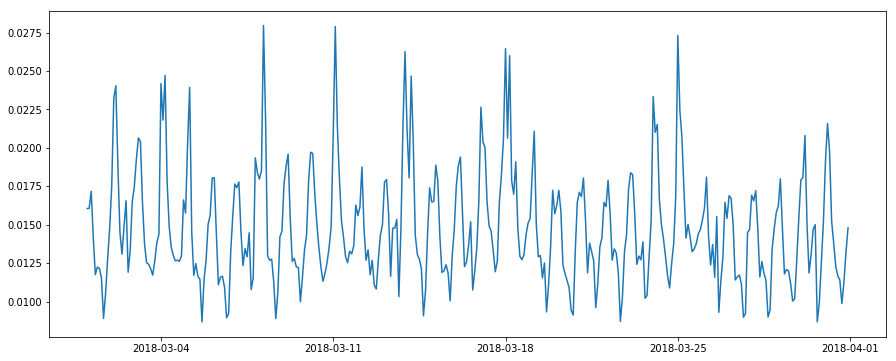

In [9]:
plt.plot(y_uber)

We can see some period fluctuation in the plot. But formally, we can check stationarity using the 
** Dickey-Fuller Test ** :

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. 
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 

** If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. **

In [10]:
from statsmodels.tsa.stattools import adfuller

#Define a function to check the stationary of the timeseries
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #pandas.rolling_count(arg, window, freq=None, center=False, how=None)
    #The number of window means we calculate 12 numbers at each time 
    #We reample the data frequecy as 2 hour, so we select one day: 12*2 = 24 hours, set window = 12
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics of Orginal, mean and std:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Usually, we can check the result in a more simple way:

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
<br>
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


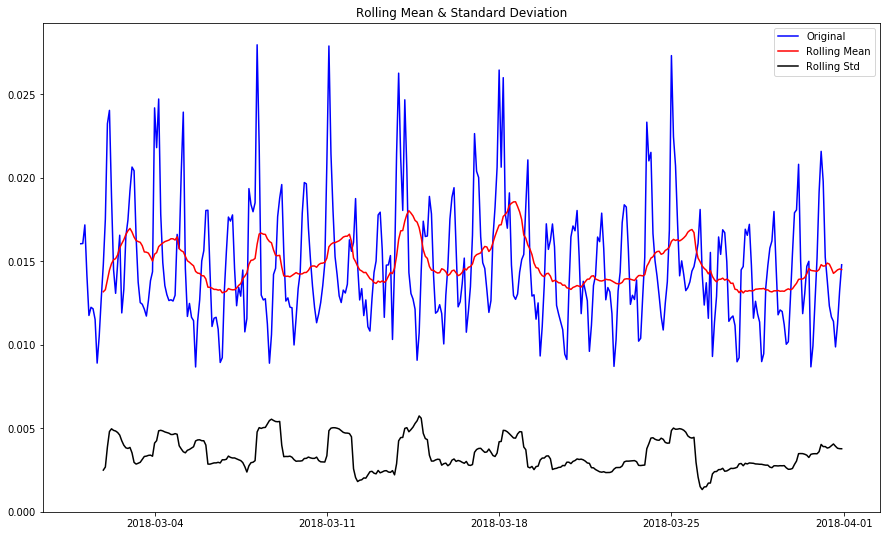

Results of Dickey-Fuller Test:
Test Statistic                  -4.938296
p-value                          0.000029
#Lags Used                      17.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


In [11]:
#Now lets test the stationarity of the dataset and plot the result
plt.rcParams['figure.figsize'] = (15, 9)
test_stationarity(y_uber)

Note that p-value < 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Also, the Test Statistic is -4.938296, which is less than Critical Value (1%) -3.448958.

So, we have 99% confidence to say that the data is stationary.

If a Time Series is non-stationaruty, there are usually two reasons:

** 1. Trend ** 
Varying mean over time. For example, the price grows over time.

** 2. Seasonality ** 
Variations at specific time-frames. For exmaple, people might have a tendency to buy cars in a particular month because of pay increment or festivals.

Although our data is stationary, we can still see some Seasonality like fluctuation in our dataset。
So, we will do some effort to make our data more stable

### Part 5: Estimating & Eliminating Trend and Seasonality

First, we can try to reduce trend can be transformation. 

We can apply transformation which penalize higher values more than smaller values. 
These can be taking a log, square root, cube root, etc. 

Lets take a  ** log ** transform here for simplicity:

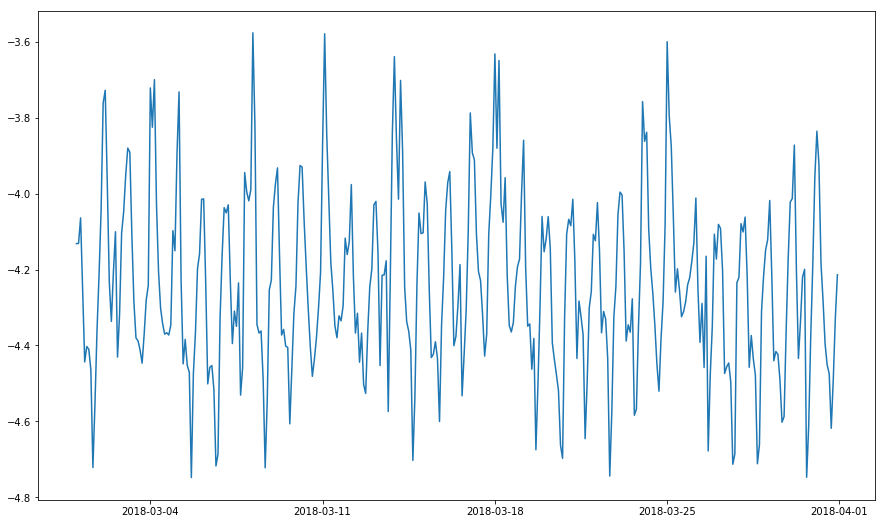

In [12]:
uber_log = np.log(y_uber)
plt.plot(uber_log)

So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

** Aggregation **

Taking average for a time period like monthly/weekly averages

** Smoothing ** 

Taking rolling averages

** Polynomial Fitting **  
Fit a regression model

We will use smoothing here in order to use our Moving Average Model.

Smoothing refers to taking rolling estimates, For example, considering the past few instances. 

### Moving Average

Here we take the average over the past 1 day, i.e. last 12 values (12 * 2 = 24 hours). 

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


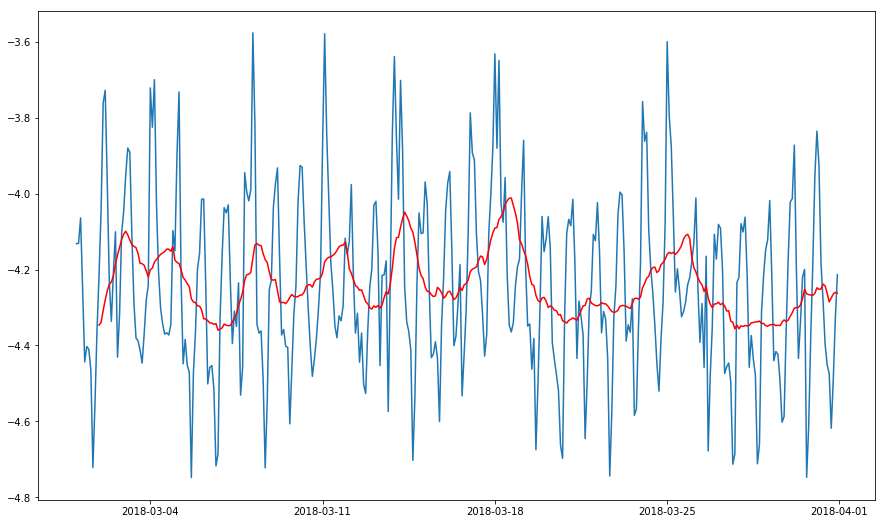

In [14]:
moving_avg = pd.rolling_mean(uber_log,12)
plt.plot(uber_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. 

Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [15]:
uber_log_moving_avg_diff = uber_log - moving_avg
uber_log_moving_avg_diff.head(12)

date_time
2018-03-01 00:00:00         NaN
2018-03-01 02:00:00         NaN
2018-03-01 04:00:00         NaN
2018-03-01 06:00:00         NaN
2018-03-01 08:00:00         NaN
2018-03-01 10:00:00         NaN
2018-03-01 12:00:00         NaN
2018-03-01 14:00:00         NaN
2018-03-01 16:00:00         NaN
2018-03-01 18:00:00         NaN
2018-03-01 20:00:00         NaN
2018-03-01 22:00:00    0.132481
Freq: 2H, Name: uber_price_per_second, dtype: float64

Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


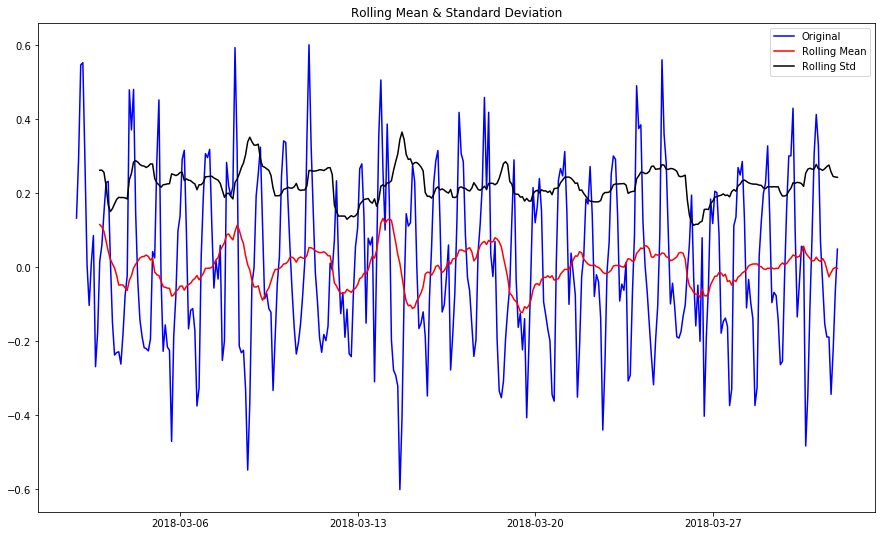

Results of Dickey-Fuller Test:
Test Statistic                -6.530094e+00
p-value                        9.919489e-09
#Lags Used                     1.700000e+01
Number of Observations Used    3.430000e+02
Critical Value (1%)           -3.449560e+00
Critical Value (5%)           -2.870004e+00
Critical Value (10%)          -2.571279e+00
dtype: float64


In [16]:
uber_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(uber_log_moving_avg_diff)

The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series.

Also, the p value reduce a lot

Now this is just a simple moving average and in order to improve this, 

We can take a **Weighted Moving Average** where more recent values are given a higher weight. 

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


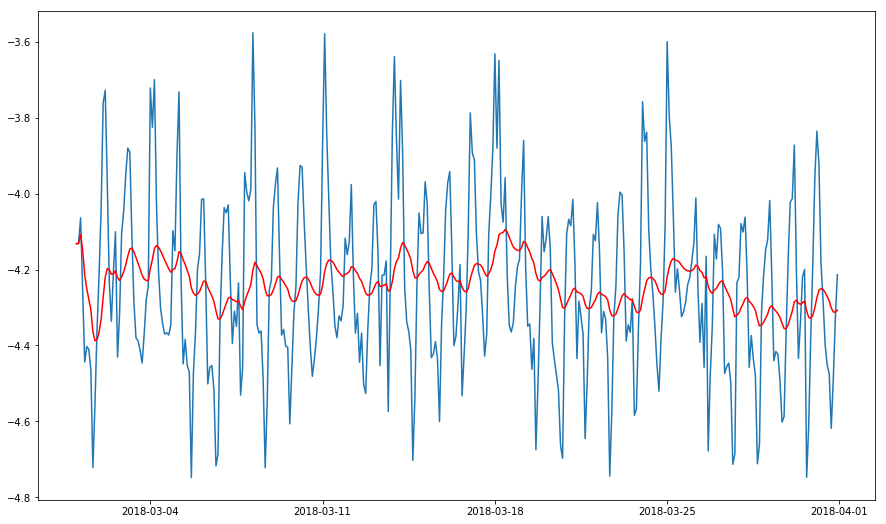

In [17]:
expwighted_avg = pd.ewma(uber_log, halflife=12)
plt.plot(uber_log)
plt.plot(expwighted_avg, color='red')

The parameter ‘halflife’ is used to define the amount of exponential decay. 

Now, let’s remove this from series and check stationarity:

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


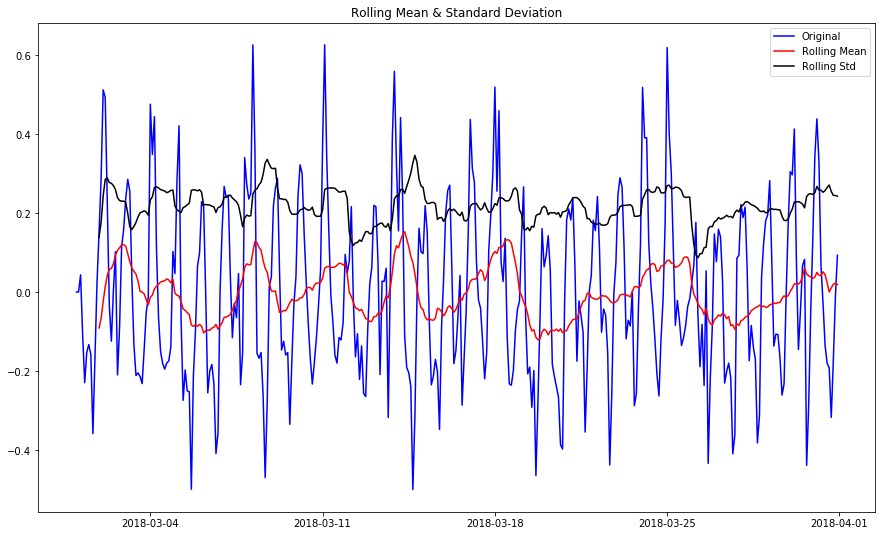

Results of Dickey-Fuller Test:
Test Statistic                -5.936612e+00
p-value                        2.312900e-07
#Lags Used                     1.700000e+01
Number of Observations Used    3.540000e+02
Critical Value (1%)           -3.448958e+00
Critical Value (5%)           -2.869739e+00
Critical Value (10%)          -2.571138e+00
dtype: float64


In [18]:
uber_log_ewma_diff = uber_log - expwighted_avg
test_stationarity(uber_log_ewma_diff)

There just a little improve and I plan to take the first one.

Now lets discuss two ways of removing trend and seasonality:

**Differencing**

Taking the differece with a particular time lag

**Decomposition** 

Modeling both trend and seasonality and removing them from the model.


### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. 

In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. 

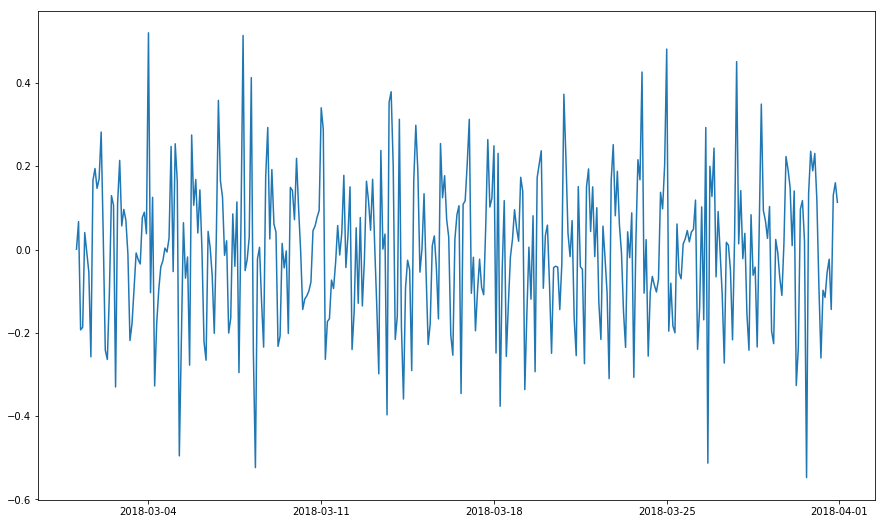

In [19]:
uber_log_diff = uber_log - uber_log.shift()
plt.plot(uber_log_diff)

Lets verify the stationary

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


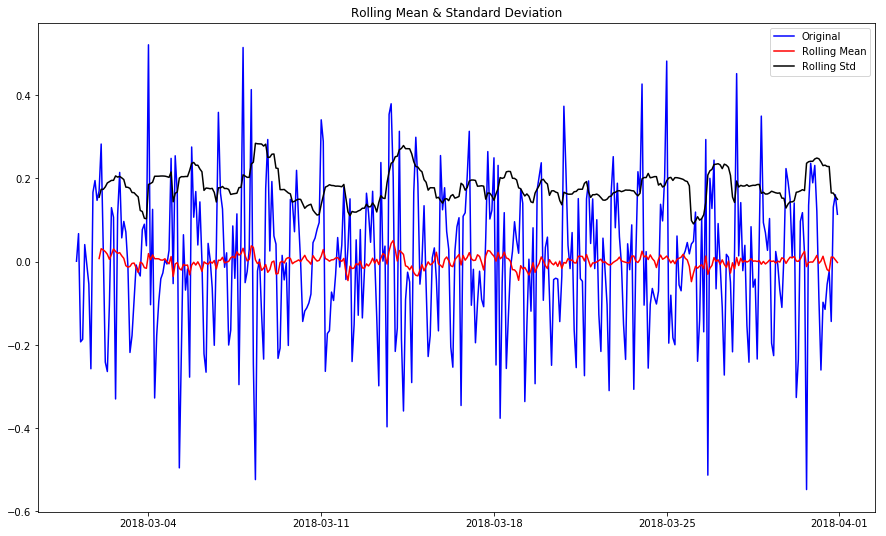

Results of Dickey-Fuller Test:
Test Statistic                  -5.632004
p-value                          0.000001
#Lags Used                      17.000000
Number of Observations Used    353.000000
Critical Value (1%)             -3.449011
Critical Value (5%)             -2.869763
Critical Value (10%)            -2.571151
dtype: float64


In [20]:
uber_log_diff.dropna(inplace=True)
test_stationarity(uber_log_diff)

The result seems much better now!

P value reduces a lot and the rolling mean is closer to 0, which proves our data becomes more stable

### Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. 

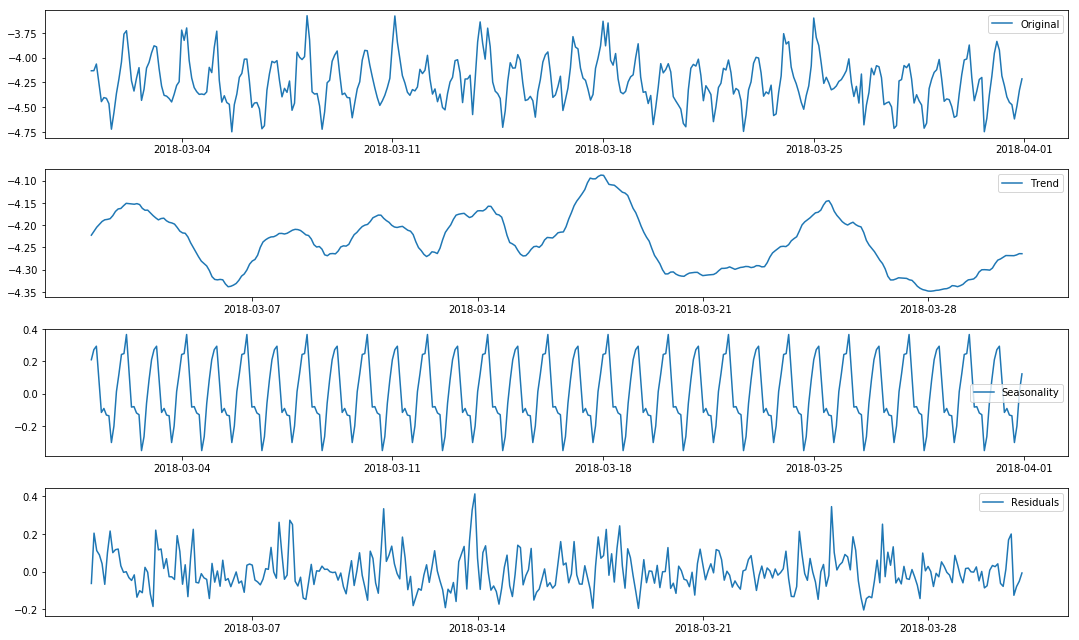

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(uber_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#These are subplot grid parameters encoded as a single integer. 
#For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".

plt.subplot(411)
plt.plot(uber_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. 

Lets check stationarity of residuals:

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # This is added back by InteractiveShellApp.init_path()


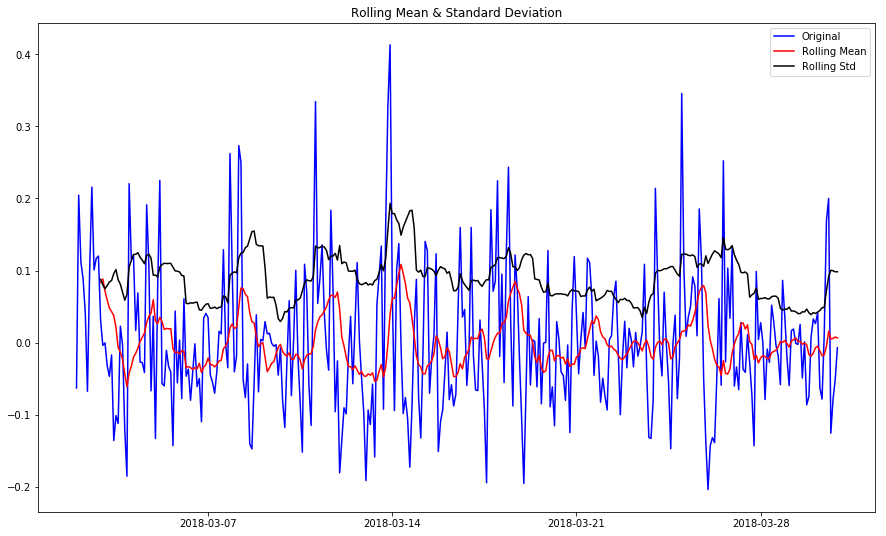

Results of Dickey-Fuller Test:
Test Statistic                -8.768752e+00
p-value                        2.554897e-14
#Lags Used                     9.000000e+00
Number of Observations Used    3.380000e+02
Critical Value (1%)           -3.449846e+00
Critical Value (5%)           -2.870129e+00
Critical Value (10%)          -2.571346e+00
dtype: float64


In [22]:
uber_log_decompose = residual
uber_log_decompose.dropna(inplace=True)
test_stationarity(uber_log_decompose)

The result is not as good as Differencing, so for our project, we will take Differencing method.

### Part 6: Forecasting a Time Series

Lets make model on the TS after differencing.

Having performed the trend and seasonality estimation techniques, there can be two situations:

**A strictly stationary series**
With no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.

**A series with significant dependence among values.** 
In this case we need to use some statistical models like ARIMA to forecast the data.

**ARIMA** stands for Auto-Regressive Integrated Moving Averages. 

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

**Number of AR (Auto-Regressive) terms (p)**: 

AR terms are just lags of **dependent variable**. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

**Number of MA (Moving Average) terms (q)**: 

MA terms are lagged **forecast errors** in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

**Number of Differences (d)**: 

These are the number of **nonseasonal differences**, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

**Autocorrelation Function (ACF)**: 

It is a measure of the correlation between the the TS with **a lagged version of itself**. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

**Partial Autocorrelation Function (PACF)**: 

This measures the correlation between the TS with a lagged version of itself but **after eliminating the variations already explained by the intervening comparisons**. 
Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [24]:
lag_acf = acf(uber_log_diff, nlags=20)
lag_pacf = pacf(uber_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

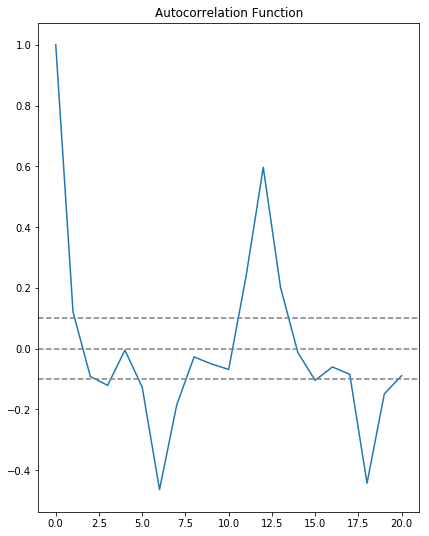

In [25]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(uber_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(uber_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

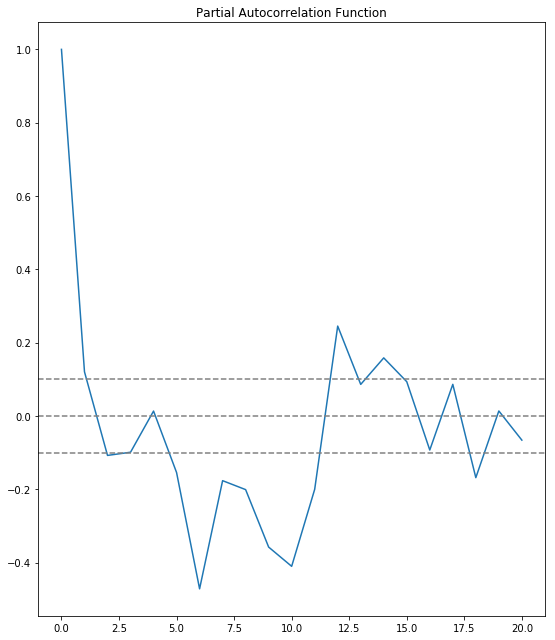

In [26]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(uber_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(uber_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

**p** – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

**q** – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects.

In [27]:
from statsmodels.tsa.arima_model import ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q).

#### AR Model

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 11.2209')

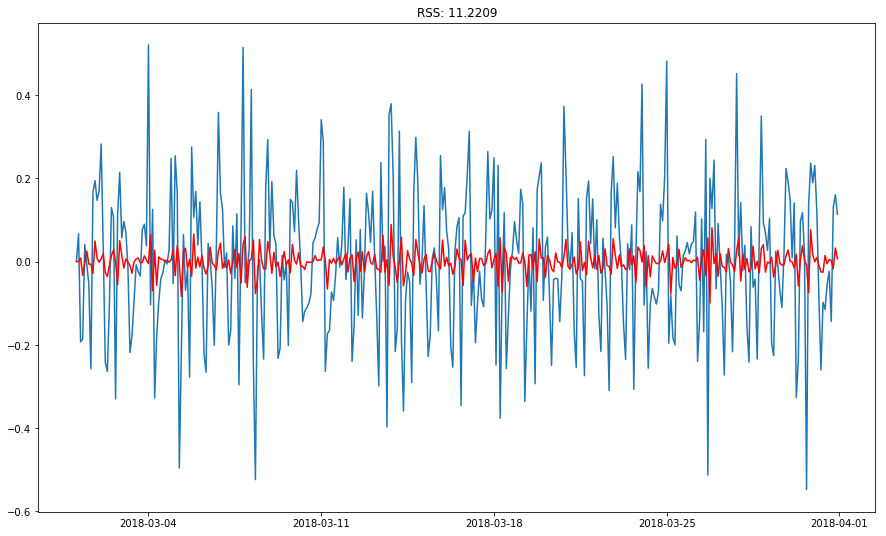

In [28]:
model = ARIMA(uber_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(uber_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-uber_log_diff)**2))

#### MR Model

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 11.2745')

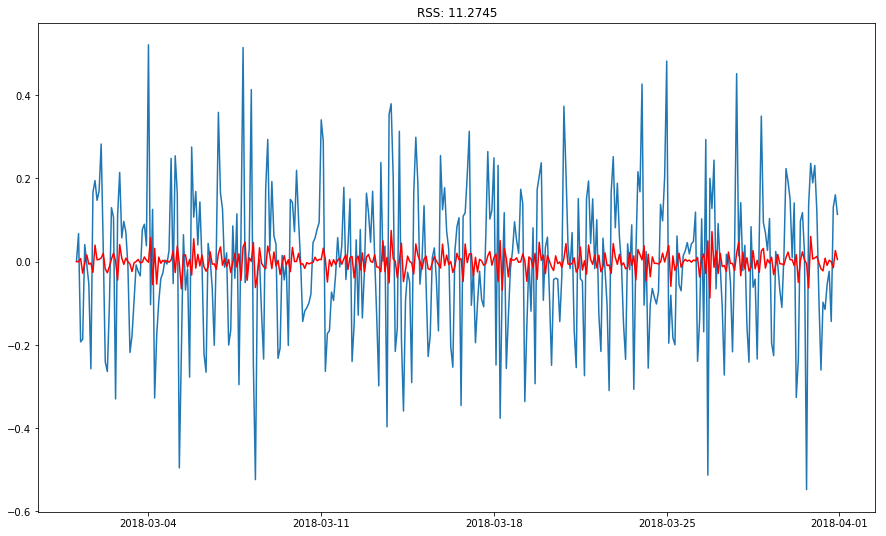

In [29]:
model = ARIMA(uber_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(uber_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-uber_log_diff)**2))

#### Combined Model

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 8.1136')

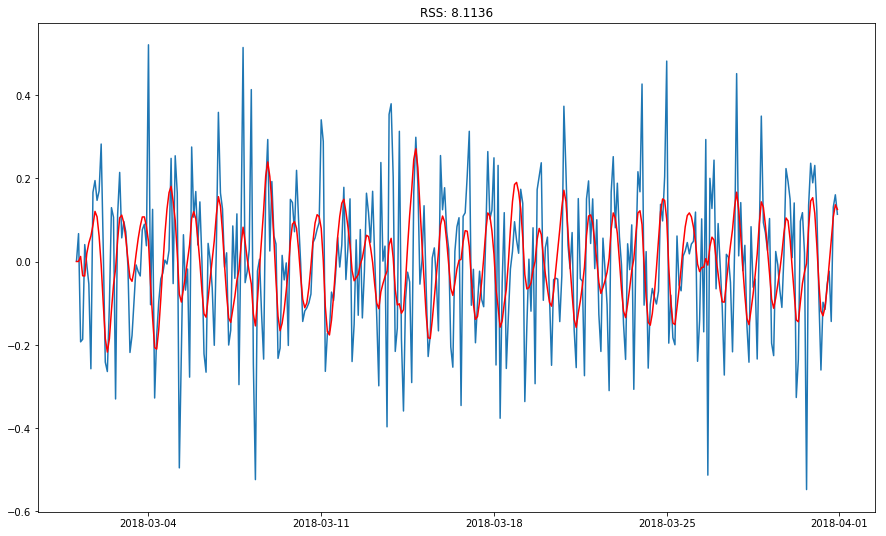

In [32]:
model = ARIMA(uber_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(uber_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-uber_log_diff)**2))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

First step would be to store the predicted results as a separate series and observe it.

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date_time
2018-03-01 02:00:00    0.000159
2018-03-01 04:00:00    0.000275
2018-03-01 06:00:00    0.012257
2018-03-01 08:00:00   -0.034082
2018-03-01 10:00:00   -0.034680
Freq: 2H, dtype: float64


Notice that these start from ‘2018-03-01 02:00:00’ and not the first hour. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. 

The way to convert the differencing to log scale is to add these differences consecutively to the base number. 

An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [35]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date_time
2018-03-01 02:00:00    0.000159
2018-03-01 04:00:00    0.000435
2018-03-01 06:00:00    0.012691
2018-03-01 08:00:00   -0.021390
2018-03-01 10:00:00   -0.056071
Freq: 2H, dtype: float64


 Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [36]:
predictions_ARIMA_log = pd.Series(uber_log.ix[0], index=uber_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date_time
2018-03-01 00:00:00   -4.131946
2018-03-01 02:00:00   -4.131787
2018-03-01 04:00:00   -4.131512
2018-03-01 06:00:00   -4.119255
2018-03-01 08:00:00   -4.153337
Freq: 2H, dtype: float64

Last step is to take the exponent and compare with the original series.

Text(0.5,1,'RMSE: 0.0063')

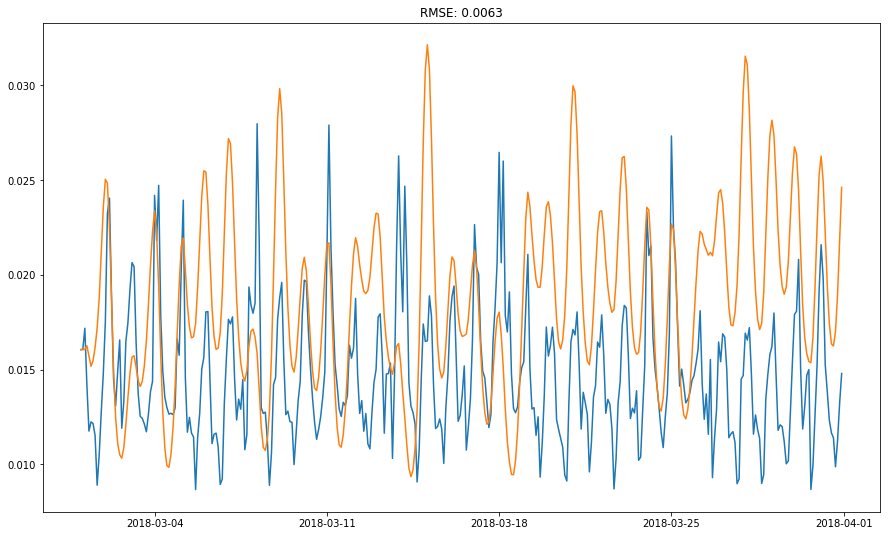

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(y_uber)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-y_uber)**2)/len(y_uber)))

Finally we have a forecast at the original scale. Not a very good forecast but we will still find the way to predict better

Source code: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/